In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [40]:
import tensorflow as tf

In [41]:
data = pd.read_csv('adult.csv')

In [42]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [43]:
data.info

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

In [44]:
data.shape

(32561, 15)

In [45]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [46]:
# preprocessing 

In [47]:
data.drop('education' , axis =1 , inplace = True )

In [48]:
data

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [49]:
data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [50]:
data = data.replace('?' , np.NaN)

In [51]:
data

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [52]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [53]:
# encoding

In [54]:
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [55]:
def get_uniques(df , columns):
    uniques = dict()
    for column in columns :
        uniques[column] = list(df[column].unique())
    return uniques

In [56]:
get_uniques(data, categorical_features)

{'workclass': [nan,
  'Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Local-gov',
  'Without-pay',
  'Never-worked'],
 'marital.status': ['Widowed',
  'Divorced',
  'Separated',
  'Never-married',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': [nan,
  'Exec-managerial',
  'Machine-op-inspct',
  'Prof-specialty',
  'Other-service',
  'Adm-clerical',
  'Craft-repair',
  'Transport-moving',
  'Handlers-cleaners',
  'Sales',
  'Farming-fishing',
  'Tech-support',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 'relationship': ['Not-in-family',
  'Unmarried',
  'Own-child',
  'Other-relative',
  'Husband',
  'Wife'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  'Other',
  'Amer-Indian-Eskimo'],
 'sex': ['Female', 'Male'],
 'native.country': ['United-States',
  nan,
  'Mexico',
  'Greece',
  'Vietnam',
  'China',
  'Taiwan',
  'India',
  'Philippines',
  'Trinadad&Tobago',
  'Canada',
  

In [57]:
binary_features = ['sex']

nominal_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

In [58]:
def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

def onehot_encode(df , columns):
    for column in columns :
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df , dummies] , axis = 1 )
        df.drop(column , axis = 1 , inplace = True)
    return df
    

In [59]:
data = binary_encode ( data , binary_features)
data = onehot_encode ( data , nominal_features)

In [60]:
(data.dtypes == 'object').sum()

1

In [61]:
# scalling

In [62]:
data

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,90,77053,9,0,0,4356,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,0,4356,18,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,0,4356,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,0,3900,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,0,3900,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,257302,12,0,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,154374,9,1,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,151910,9,0,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False


In [63]:
x= data.drop('income' , axis = 1)
y= data['income']

In [64]:
label_encoder = LabelEncoder()

In [65]:
y= label_encoder.fit_transform(y)

In [66]:
y_mappings = {index: label for index , label in enumerate(label_encoder.classes_)}

In [67]:
y_mappings

{0: '<=50K', 1: '>50K'}

In [68]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [69]:
scaler = MinMaxScaler()

In [70]:
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [71]:
x

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,Federal-gov,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,1.000000,0.043987,0.533333,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.136986,0.166404,0.733333,0.0,0.0,0.000000,0.377551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.315068,0.096500,0.533333,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
# training

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [75]:
inputs = tf.keras.Input(shape=(88,))
X = tf.keras.layers.Dense(16, activation='relu')(inputs)
X = tf.keras.layers.Dense(16, activation='relu')(X)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(X)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics = [
    tf.keras.metrics.BinaryAccuracy(name='acc'),
    tf.keras.metrics.AUC(name='auc')
]

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=metrics
)


batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

In [76]:
# result

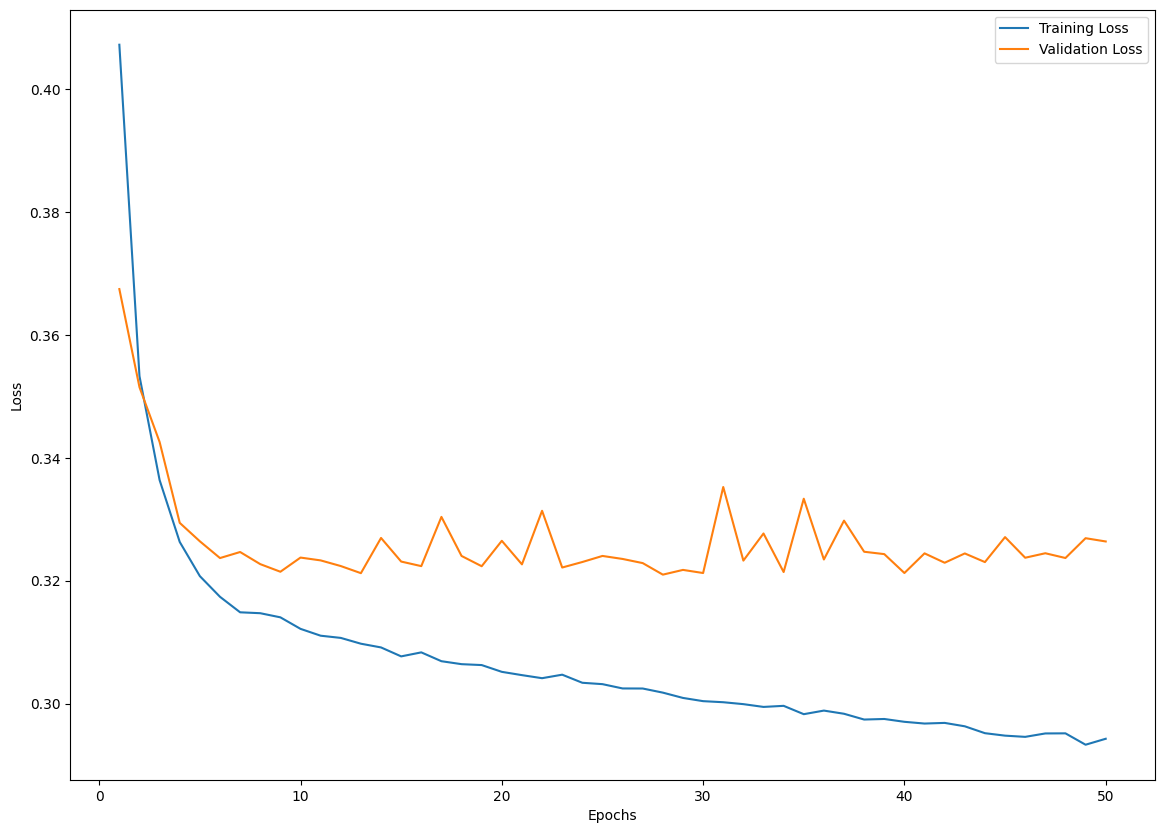

In [77]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [78]:
np.argmin(val_loss)

27

In [79]:
model.evaluate(X_test, y_test)

204/204 [==============================] - 1s 2ms/step - loss: 0.3249 - acc: 0.8537 - auc: 0.9062


[0.32493385672569275, 0.8536772727966309, 0.9061678647994995]

In [80]:
y.sum() / len(y)

0.2408095574460244